SHAP:

https://towardsdatascience.com/explainable-ai-xai-with-shap-regression-problem-b2d63fdca670

SmoothGrad:

https://towardsdatascience.com/recent-advancements-in-explainable-neural-networks-2cd06b5d2016

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import all the necessary libraries

import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import cv2

# Installing Shap libary; this needs to be reinstalled for every run
!pip install shap
import shap

from keras.models import load_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.8 MB/s eta 0:00:00


In [ ]:
print(tf.__version__)
print(shap.__version__)

2.15.0
0.44.0


In [ ]:
# Create a reference dataset for use by DeepExplainer

images_dir = 'content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign'

#test_datagen = ImageDataGenerator()
#x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

model = load_model('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5')
#x_test = # select sample x_test of batch size 9
#x_test = cv2.imread('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Test/Benign/IM235_2.jpg')
#x_test = cv2.imread('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_3_1_4_img064.jpeg')
#x_test = cv2.imread('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_3_1_4_img059.jpeg')
#x_test = cv2.imread('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/IMG-0026.jpg')

#x_test = cv2.imread('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Malignant/Folder_21_3_1_img7.jpg')
x_test = cv2.imread('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Malignant/69.jpg')

#x_test = tf.keras.preprocessing.image_dataset_from_directory(images_dir, labels='inferred', label_mode='categorical',batch_size=32, image_size=(224, 224))

x_test = cv2.resize(x_test, (224, 224))
x_test = np.expand_dims(x_test, axis=0)

# Feature Normalization (to [0,1])
x_test = x_test.astype('float32') / 255.0

background = shap.utils.sample(x_test, 100)

shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
shap.explainers._deep.deep_tf.op_handlers["FusedBatchNormV3"] = shap.explainers._deep.deep_tf.passthrough
explainer = shap.DeepExplainer(model, background)

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
%ls

 Academic_Courses_and_ML_Projects/
'Colab Notebooks'/
'Copy of CV TEMPLATE (Graduate School).gdoc'
'Family Photos'/
'Important Documents - External Hard Drive'/
 MS_Application_Docs_Yocket/
 Paper_FinalVersion.gdoc
'SPHS, NITDurgapur, MuSigmaTHD, MuSigmaJ&J, MBRDI Photos'/


In [ ]:
%cd Academic_Courses_and_ML_Projects/

/content/drive/MyDrive/Academic_Courses_and_ML_Projects


In [ ]:
%ls

 Books/
'Colab Notebooks'/
 Courses/
'Courses (1)'/
'Dr. Prathosh AP Resources and Materials.zip'
 Explainable_AI/
'GRE Books'/
'GRE Materials.zip'
'Miscellaneous Files'/
'MS Application'/
'MS Universities'/
'Omdena Project Group Photo'/
 Paper_Publications_Files/
 Projects/
 Sensitivity_Analysis_PCOS_Factors_Final_Paper_Submission.docx
 Slides/
'TOEFL Materials.zip'
 vgg_weights.h5
'Your Magoosh Receipt.pdf'


In [ ]:
%cd Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign

/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign


In [ ]:
%ls

 01.jpg                     Folder_3_1_5_img056.jpg    Folder_7_3_5_img15.jpg   IM244.jpg
 02.jpg                     Folder_3_1_5_img057.jpg    Folder_7_3_5_img16.jpg   IM246_1.jpg
 03.jpg                     Folder_3_1_5_img058.jpg    Folder_7_3_5_img17.jpg   IM246_2.jpg
 041.jpg                    Folder_3_1_5_img059.jpg    Folder_7_3_5_img18.jpg   IM246.jpg
 042.jpg                    Folder_3_1_5_img060.jpg    Folder_7_3_5_img19.jpg   IM247_1.jpg
 043.jpg                    Folder_3_1_5_img061.jpg    Folder_7_3_5_img1.jpg    IM247_2.jpg
 044.jpg                    Folder_3_1_5_img062.jpeg   Folder_7_3_5_img20.jpg   IM247.jpg
 045.jpg                    Folder_3_1_5_img063.jpg    Folder_7_3_5_img21.jpg   IM248_1.jpg
 046.jpg                    Folder_3_1_5_img064.jpg    Folder_7_3_5_img22.jpg   IM248_2.jpg
 047.jpg                    Folder_3_1_5_img065.jpg    Folder_7_3_5_img23.jpg   IM248.jpg
 048.jpg                    Folder_3_1_5_img066.jpg    Folder_7_3_5_img24.jpg   IM249_1.

In [ ]:
x_test.shape

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [ ]:
# Choose a random sample from the test set to explain (against the background)

sample_index = np.random.randint(0, x_test.shape[0])
sample_image = x_test[sample_index]
print("sample_index: \t:", sample_index, "\n")
print("sample_image.shape: \t", sample_image.shape, "\n")

sample_index: 	: 0 

sample_image.shape: 	 (224, 224, 3) 



In [ ]:
# Calculate SHAP values for the input sample

sample_image_batch = np.expand_dims(sample_image, axis=0)  # Add batch dimension

shap_values = explainer.shap_values(sample_image_batch)
print("sample_image_batch.shape: \t", sample_image_batch.shape, "\n")
print("len(shap_values): \t", len(shap_values), "\n")

sample_image_batch.shape: 	 (1, 224, 224, 3) 

len(shap_values): 	 1 



In [ ]:
sample_image_batch.shape

(1, 224, 224, 3)

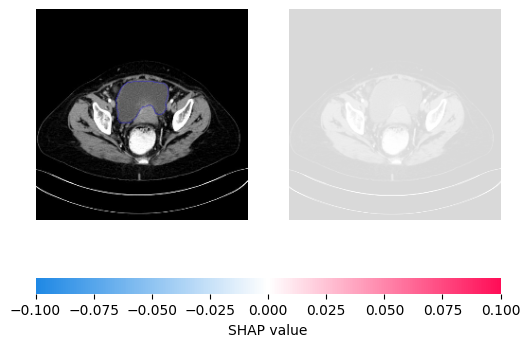

In [ ]:
# Visualize the SHAP values

shap.image_plot(shap_values, sample_image_batch)

In [ ]:
# Now implementing the SmoothGrad algorithm

NUM_ITERATIONS = 3 # equal to number of images that we wish to generate
shap_values_list = []

perturbed_image_batch: 
 (1, 224, 224, 3) 



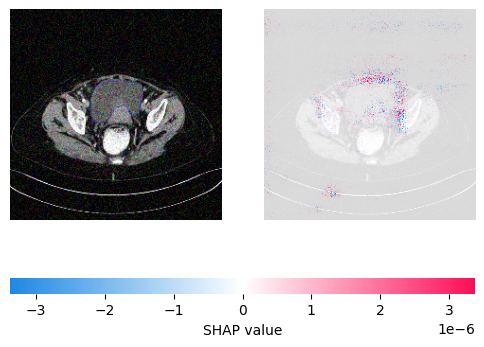

perturbed_image_batch: 
 (1, 224, 224, 3) 



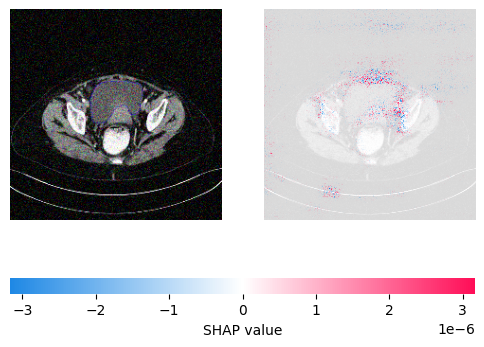

perturbed_image_batch: 
 (1, 224, 224, 3) 



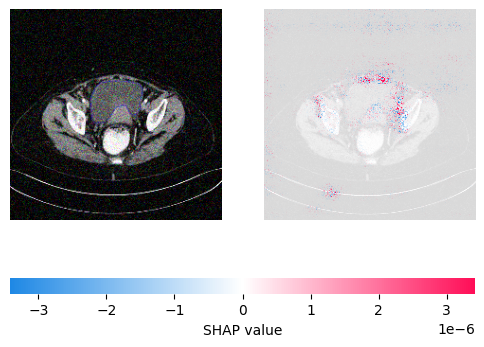

In [ ]:
for _ in range(NUM_ITERATIONS):

    perturbed_image = sample_image + np.random.normal(loc=0, scale=0.1, size=sample_image.shape)

    #print("perturbed_image.shape: \t", perturbed_image.shape, "\n")
    #print("np.min(perturbed_image): \t", np.min(perturbed_image), "\n")
    #print("np.max(perturbed_image): \t", np.max(perturbed_image), "\n")
    perturbed_image = np.clip(perturbed_image, 0, 1)
    #print("-----------------------------------------------------------------------------------")
    #print("np.min(perturbed_image): \t", np.min(perturbed_image), "\n")
    #print("np.max(perturbed_image): \t", np.max(perturbed_image), "\n\n")
    perturbed_image_batch = np.expand_dims(perturbed_image, axis=0)
    print("perturbed_image_batch: \n", perturbed_image_batch.shape, "\n")
    shap_values = explainer.shap_values(perturbed_image_batch)
    shap.image_plot(shap_values, perturbed_image_batch)
    shap_values_list.append(shap_values)

In [ ]:
# LIME implementation

!pip install lime
import lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e98294a64a0e69252f3f4789e229abac6a606660a77720765c8fb164e0e6850e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image

In [ ]:
def predict_fn(images):
    images = images.reshape((-1, 224, 224, 3))
    return model.predict(images)

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(x_test[sample_index].astype('double'), predict_fn, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


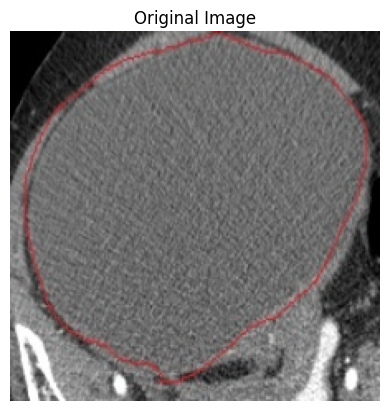

In [ ]:
# Display original image at index = sample_index

import matplotlib.pyplot as plt
plt.imshow(x_test[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

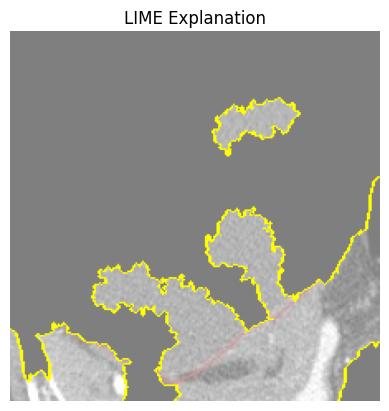

In [ ]:
# Getting the lime predictions

from skimage.segmentation import slic, mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=100, hide_rest=True)
plt.imshow(mark_boundaries(temp/2 + 0.5, mask))
plt.title('LIME Explanation')
plt.axis('off')
plt.show()